<a href="https://colab.research.google.com/github/GeraldL19/loan_default_prediction/blob/main/credit_risk_trial_DE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/laotse/credit-risk-dataset/data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [5]:
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [6]:
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

In [7]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

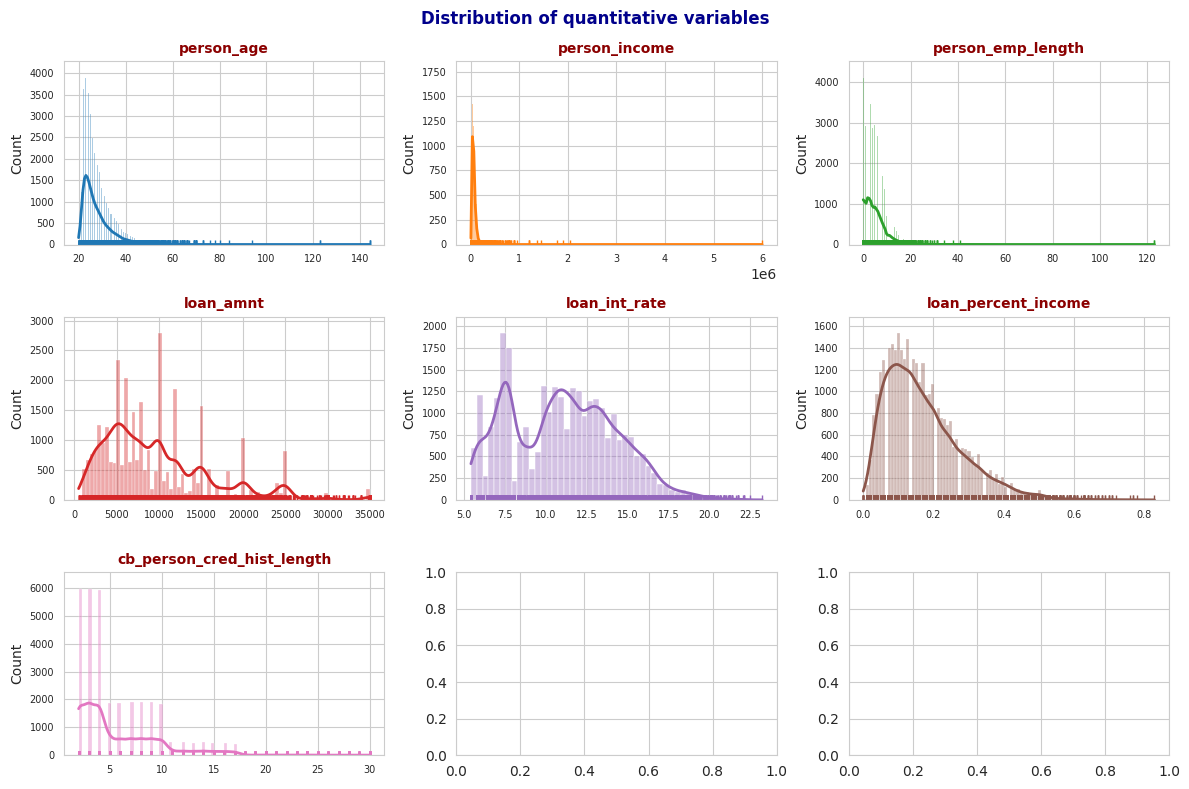

In [8]:
# Quantitative variables:
num_cols = ["person_age", "person_income", "person_emp_length", "loan_amnt", "loan_int_rate",
            "loan_percent_income", "cb_person_cred_hist_length"]
# Let's visualize the distribution of the quantitative variables.
sb.set_style("whitegrid")
fig,axes = plt.subplots(nrows = 3, ncols = 3, figsize = (12,8))
axes = axes.flat

for i,col in enumerate(num_cols):
  sb.histplot(df,
               x = col,
               stat = "count",
               kde = True,
               line_kws = {"linewidth":2.0},
               alpha = 0.4,
               color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
               ax = axes[i])
  sb.rugplot(df,
              x = col,
              color = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
              ax = axes[i])

  axes[i].set_xlabel("")
  axes[i].set_title(f"{col}", fontsize = 10, fontweight = "bold", color = "darkred")
  axes[i].tick_params(labelsize = 7)

fig.suptitle("Distribution of quantitative variables", fontsize = 12, fontweight = "bold", color = "darkblue")
fig.tight_layout()
fig.show()

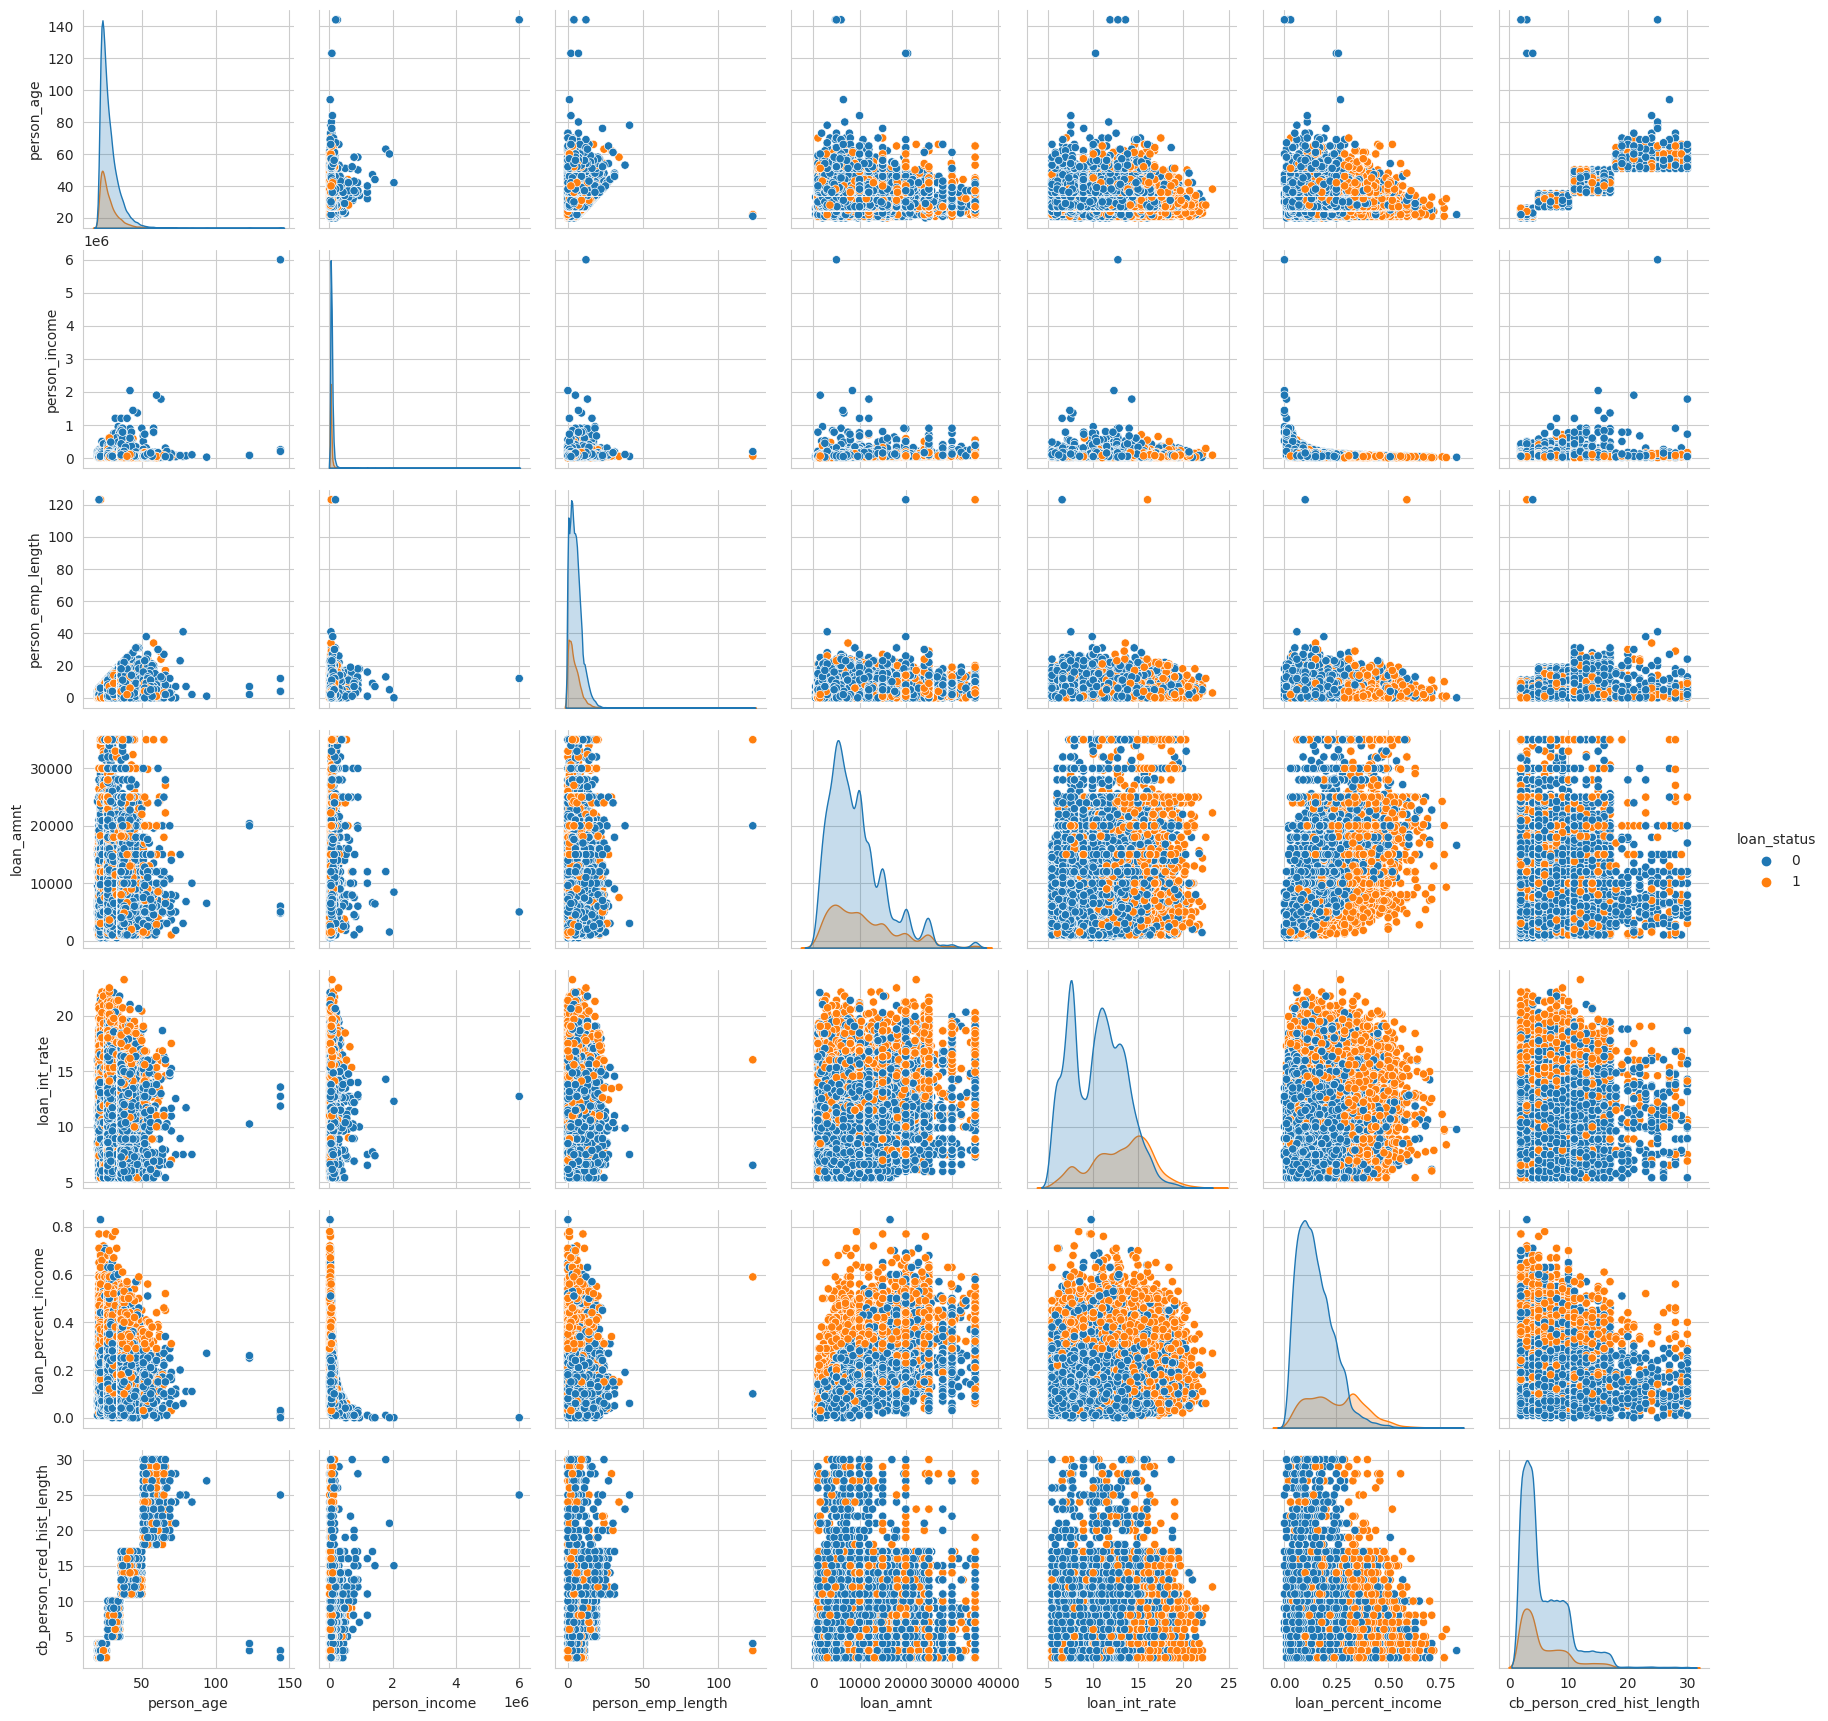

In [9]:
sb.pairplot(df, vars = num_cols,  hue="loan_status")